<div style="display:block;  float:none">
<div style="display:inline; float:left; width:15%; height:12em;">
<br>
<img src="images/logomaI.png" alt="logomaI" style="display:block; float:left; width:95%;"> 
</div>

<div style="display:block; float:left; width:70%; height:12em">
    <h4 style="text-align: center;">ESCUELA TÉCNICA SUPERIOR DE INGENIERÍA INFORMÁTICA</h4>
    <h4 style="text-align: center;">UNIVERSIDAD DE SEVILLA</h4> 
    <h3 style="text-align: center;">MATEMÁTICA APLICADA A TECNOLOGÍAS DE LA INFORMACIÓN</h3>
</div>

<div style="display:inline; float:left; width:15%; height:12em">
<img src="images/logoUS.png" alt="logoUS" style="display:block; float:left; width:90%;"> 
</div>
</div>

<center>  
    
# PROBLEMA DE LOS CUBOS CON LAS CARAS DE COLORES

</center><br><br> 


Elaborado por el *GRUPO 2*.  

Dirigido por *Ramos González, Víctor*  

Autores: *Abban Ehentam, Mathias. Aranda Triana, Juan Antonio. Calcedo Vázquez, José. Corpas Espinar, Antonio. Jurado Ortiz, José Luis. Ramos González, Víctor. Ramos Molinero, José Felipe. Trujillo Gómez, Isabel María.*  


### 1. ENUNCIADO DEL PROBLEMA

El juego de los cubos con caras de colores consta de cuatro cubos en cuyas caras aparecen cuatro colores.
Cada cubo tiene con un determinado patrón de colores en sus caras. El reto es apilarlos uno encima de
otro formando una columna de manera que en los cuatro lados de la columna aparezcan los cuatro colores.

Se pide: 

1. Diseñar un algoritmo usando la Teoría de Grafos para resolver cualquier instancia de dicho juego o probar
que es imposible hacerlo.  

2. Implementar dicho algoritmo utilizando las herramientas adecuadas.

3. Aplicarlo a la resolución de los juegos: 

<img src="images/cubosJuego1.png" alt="logoUS" style="display:block; width:40%"> 
<center> Juego 1 (<i>Solución única</i>) </center>  
<br>

<img src="images/cubosJuego2.png" alt="logoUS" style="display:block; width:40%"> 
<center>Juego 2. (<i>Sin solución</i>)</center>  
<br>

<img src="images/cubosJuego3.png" alt="logoUS" style="display:block; width:40%"> 
<center>Juego 3. (<i>3 Soluciones</i>)</center>  
<br>

### 2. FUNDAMENTOS TEÓRICOS


$\boxed{TO \, DO}$



### 3. IMPLEMENTACIÓN DEL ALGORITMO
#### 3.1. REPRESENTACIÓN DE LOS CUBOS


$\boxed{TO \, DO}$


In [13]:
cubo_1 = [('A', 'A'),('AM','V'),('A','R')]
cubo_2 = [('V', 'R'),('A', 'V'),('AM', 'A')]
cubo_3 = [('V', 'AM'),('R','R'),('A','AM')]
cubo_4 = [('AM','V'),('V','R'),('R','A')]
cubo_5 = [('G','G'),('G','G'),('G','G')]
game = [cubo_1,cubo_2,cubo_3,cubo_4, cubo_5]

#### 3.2. CREACIÓN DEL GRAFO DE PARTIDA


$\boxed{TO \, DO}$


In [14]:
def graph_from_cubes(cubes):
    G = Graph(loops=True, multiedges=True)
    for i, edges_ci in enumerate(cubes):
        G.add_edges(map(lambda x: tuple(list(x) + [str(i+1)]) , edges_ci))
    
    return G

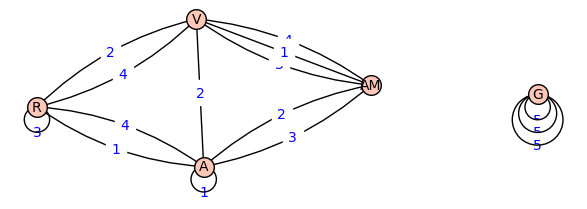

In [15]:
G_cubes = graph_from_cubes(game)
colors = set(G_cubes.vertices())
ncubes = len(game)
cubes_inds = set(str(i) for i in range(1, ncubes+1))
game_edges = list(G_cubes.edges())
plot(G_cubes, edge_labels=True)

#### 3.3. BÚSQUEDA DE LOS SUBGRAFOS VÁLIDOS DEL GRAFO


$\boxed{TO \, DO}$



In [16]:
def all_cycles(graph):
    G = Graph(graph)    
    cycleList=[]
    for e in G.edges(labels=True):
        G.delete_edge(e)
        if e[0] == e[1] :
            cycleList.append(tuple([e]))
        else:
            for path in G.all_paths(e[1], e[0], use_multiedges=True, report_edges=True, labels = True):
                cycleList.append(tuple([e] + list(path)))
    return list(cycleList)

def colors_in_cycle(cycle):
    return set(sum(map(lambda x: x[:2], cycle), ()))

def cubes_in_cycle(cycle):
    return set(map(lambda x: x[2], cycle))
    
def is_valid_cycle(s, colors, cubes_inds):
    return colors_in_cycle(s)==colors and cubes_in_cycle(s)==cubes_inds

cycles = all_cycles(G_cubes)
cycles

[(('A', 'A', '1'),),
 (('A', 'AM', '2'), ('A', 'AM', '3')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('A', 'V', '2')),
 (('A', 'AM', '2'), ('AM', 'V', '3'), ('A', 'V', '2')),
 (('A', 'AM', '2'), ('AM', 'V', '4'), ('A', 'V', '2')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('R', 'V', '2'), ('A', 'R', '1')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('R', 'V', '2'), ('A', 'R', '4')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('R', 'V', '4'), ('A', 'R', '1')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('R', 'V', '4'), ('A', 'R', '4')),
 (('A', 'AM', '2'), ('AM', 'V', '3'), ('R', 'V', '2'), ('A', 'R', '1')),
 (('A', 'AM', '2'), ('AM', 'V', '3'), ('R', 'V', '2'), ('A', 'R', '4')),
 (('A', 'AM', '2'), ('AM', 'V', '3'), ('R', 'V', '4'), ('A', 'R', '1')),
 (('A', 'AM', '2'), ('AM', 'V', '3'), ('R', 'V', '4'), ('A', 'R', '4')),
 (('A', 'AM', '2'), ('AM', 'V', '4'), ('R', 'V', '2'), ('A', 'R', '1')),
 (('A', 'AM', '2'), ('AM', 'V', '4'), ('R', 'V', '2'), ('A', 'R', '4')),
 (('A', 'AM', '2'), ('AM', 'V', '4'), ('R'

Hemos obtenido anteriormente todos los ciclos posibles de nuestro grafo. Ahora bien, ¿cuales de estos nos interesan para obtener las soluciones? La respuesta viene dada en la función auxiliar is_valid_cycle. En efecto, los ciclos que nos interesan como soluciones incluyen todos los distintos colores de los cubos (colors_in_cycle(s)==colors) y que el ciclo sea de longitud igual al número de cubos con los que estamos jugando (en nuestro caso cubes_in_cycle(s)==cubes_inds, recordad que el número de cubos es la constante ncubes).     

Una vez obtenidos los subgrafos válidos, cabe la posibilidad de que en el resto de grafos haya otros posibles candidatos a soluciones. Para obtenerlos, recorreremos la lista pending_subgraphs, evaluando cada elemento de esta forma:

- Si el elemento es un ciclo de longitud igual a ncubes, se evalua si es un ciclo válido (con is_valid_cycle). Si es así, se añade a la lista de ciclos válidos y pasamos al siguiente. Esto puede parecer raro porque ya hemos filtrado antes todos los de longitud ncubes, luego ninguno debería cumplir esa condición, pero no os preocupéis demasiado; ahora explicamos por qué es así.
- Si su longitud es inferior a ncubes, para cada elemento c de la lista de pending_subgraphs, comprobamos si se cumple que la intersección del conjunto de los vértices del elemento actual con c es el conjunto vacío, es decir, que no tienen vértices en común. Al mismo tiempo, comprobamos si la longitud del ciclo del elemento actual con la longitud del ciclo del elemento c tiene una suma igual o inferior a ncubes. De cumplirse ambas condiciones, creamos un ciclo nuevo con la suma de estos dos elementos y lo añadimos a la lista de grafos pendientes, volviendo al paso de arriba.

Finalmente, los subgrafos válidos son almacenados en una lista para su posterior uso

In [17]:
valid_subgraphs = list(filter(lambda x: is_valid_cycle(x, colors, cubes_inds), cycles))
pending_subgraphs = list(filter(lambda x: len(x)<ncubes, cycles))

while pending_subgraphs:
    current_cycle = pending_subgraphs.pop(0)
    colors_in_current = colors_in_cycle(current_cycle)
    if len(current_cycle)==ncubes:
        if is_valid_cycle(current_cycle, colors, cubes_inds):
            valid_subgraphs.append(current_cycle)
    else:
        for c in pending_subgraphs:
            if (colors_in_current.intersection(colors_in_cycle(c))== set()) and (len(c)+len(current_cycle)) <= ncubes:
                pending_subgraphs.append(current_cycle + c) 
                
r= []
for c in valid_subgraphs:
    csort = list(c)
    csort.sort(key=lambda x: x[2])
    r.append(tuple(csort))
valid_subgraphs = r

In [18]:
valid_subgraphs

[(('A', 'R', '1'),
  ('A', 'AM', '2'),
  ('AM', 'V', '3'),
  ('R', 'V', '4'),
  ('G', 'G', '5')),
 (('A', 'R', '1'),
  ('A', 'AM', '2'),
  ('AM', 'V', '3'),
  ('R', 'V', '4'),
  ('G', 'G', '5')),
 (('A', 'R', '1'),
  ('A', 'AM', '2'),
  ('AM', 'V', '3'),
  ('R', 'V', '4'),
  ('G', 'G', '5')),
 (('AM', 'V', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('A', 'R', '4'),
  ('G', 'G', '5')),
 (('AM', 'V', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('A', 'R', '4'),
  ('G', 'G', '5')),
 (('AM', 'V', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('A', 'R', '4'),
  ('G', 'G', '5')),
 (('A', 'R', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('AM', 'V', '4'),
  ('G', 'G', '5')),
 (('A', 'R', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('AM', 'V', '4'),
  ('G', 'G', '5')),
 (('A', 'R', '1'),
  ('R', 'V', '2'),
  ('A', 'AM', '3'),
  ('AM', 'V', '4'),
  ('G', 'G', '5'))]

#### 3.4. EXTRACCIÓN DE SOLUCIONES

Una vez obtenidos todos los subgrafos válidos, es hora de averiguar cuáles son las soluciones del problema. Recordemos que una solución consiste en un par de subgrafos, uno que representa las caras delantera y trasera de todos los cubos apilados y otro que representa los laterales. 

Para obtener las soluciones, para cada pareja de subgrafos (s1 y s2) en la lista que obtuvimos en el punto anterior juntamos todas las aristas de ambos en el array sol_edges. Tras esto, se deben cumplir los siguientes requisitos para aceptar al par (s1, s2) como solución:

- Para cada uno de los dos grafos, el número de ocurrencias en sol_edges debe ser menor o igual que en gcubes_edges. 
- Tanto el par (s1, s2) como el par (s2, s1) no deben estar en nuestra lista de soluciones. 

Si se cumplen estas condiciones, incluimos el par (s1, s2) en nuestra lista de soluciones sols y seguimos con el bucle hasta agotar todos los grafos.

In [19]:
sols = []
gcubes_edges = list(G_cubes.edges())
for i,s1 in enumerate(valid_subgraphs):
    for s2 in valid_subgraphs[i+1:]:
        sol_edges = s1 + s2
        if all(gcubes_edges.count(e) >= sol_edges.count(e) for e in set(s1+s2)) and (s1,s2) not in sols and (s2,s1) not in sols:
            sols.append((s1,s2))

In [20]:
sols

[((('A', 'R', '1'),
   ('A', 'AM', '2'),
   ('AM', 'V', '3'),
   ('R', 'V', '4'),
   ('G', 'G', '5')),
  (('AM', 'V', '1'),
   ('R', 'V', '2'),
   ('A', 'AM', '3'),
   ('A', 'R', '4'),
   ('G', 'G', '5')))]

#### 3.5. ALGORITMO FINAL

In [21]:
def instant_insanity_solver(game):
    '''
    '''
    def graph_from_cubes(cubes):
        G = Graph(loops=True, multiedges=True)
        for i, edges_ci in enumerate(cubes):
            G.add_edges(map(lambda x: tuple(list(x) + [str(i+1)]) , edges_ci))

        return G

    def all_cycles(graph):
        G = Graph(graph)    
        cycleList=[]
        for e in G.edges(labels=True):
            G.delete_edge(e)
            if e[0] == e[1] :
                cycleList.append(tuple([e]))
            else:
                for path in G.all_paths(e[1], e[0], use_multiedges=True, report_edges=True, labels = True):
                    cycleList.append(tuple([e] + list(path)))
        return list(cycleList)

    def colors_in_cycle(cycle):
        return set(sum(map(lambda x: x[:2], cycle), ()))

    def cubes_in_cycle(cycle):
        return set(map(lambda x: x[2], cycle))

    def is_valid_cycle(s, colors, cubes_inds):
        return colors_in_cycle(s)==colors and cubes_in_cycle(s)==cubes_inds
    
    
    # Graph initialization
    
    G_cubes = graph_from_cubes(game)
    
    
    colors = set(G_cubes.vertices())
    ncubes = len(game)
    cubes_inds = set(str(i) for i in range(1, ncubes+1))
    
    # Search for valid subgraphs
    
    ## Search of all_cycles 
    
    cycles = all_cycles(G_cubes)
    
    ## Filter the complete cycles selecting those that are valid
    
    valid_subgraphs = list(filter(lambda x: is_valid_cycle(x, colors, cubes_inds), cycles))

     ## Search for union of cycles that are valid
        
    pending_subgraphs = list(filter(lambda x: len(x)<ncubes, cycles))

    while pending_subgraphs:
        current_cycle = pending_subgraphs.pop(0)
        colors_in_current = colors_in_cycle(current_cycle)
        if len(current_cycle)==ncubes:
            if is_valid_cycle(current_cycle, colors, cubes_inds):
                valid_subgraphs.append(current_cycle)
        else:
            for c in pending_subgraphs:
                if (colors_in_current.intersection(colors_in_cycle(c))== set()) and (len(c)+len(current_cycle)) <= ncubes:
                    pending_subgraphs.append(current_cycle + c) 
                    
    ## Sort the cycles by the cube asociated to the edge 
                
    r= []
    for c in valid_subgraphs:
        csort = list(c)
        csort.sort(key=lambda x: x[2])
        r.append(tuple(csort))
    valid_subgraphs = r
   

    # Extract solutions from the subgraphs
    sols = []
    gcubes_edges = list(G_cubes.edges())
    for i,s1 in enumerate(valid_subgraphs):
        for s2 in valid_subgraphs[i+1:]:
            sol_edges = s1 + s2
            if all(gcubes_edges.count(e) >= sol_edges.count(e) for e in set(s1+s2)) and (s1,s2) not in sols and (s2,s1) not in sols:
                sols.append((s1,s2))
                
                
    # Get cubes from solutions (toDo)
    
    # 
    # if len(sols) == 0:
    #    print("El problema no tiene solución")
    
    return sols
    
    

### 4. PRUEBAS 
#### 4.1. JUEGO 1 (*Solución única*)

<img src="images/cubosJuego1.png" alt="logoUS" style="display:block; width:40%"> 
<br>

In [22]:
game1 = [
    [('A', 'A'),('A','R'),('AM','V')],
    [('A', 'V'),('AM', 'A'),('V', 'R')],
    [('A', 'AM'),('R','R'),('AM','V')],
    [('A','R'),('V','AM'),('V','R')]
]
instant_insanity_solver(game1)

[((('A', 'R', '1'), ('A', 'AM', '2'), ('AM', 'V', '3'), ('R', 'V', '4')),
  (('AM', 'V', '1'), ('R', 'V', '2'), ('A', 'AM', '3'), ('A', 'R', '4')))]

#### 4.2. JUEGO 2 (*Sin solución*)

<img src="images/cubosJuego2.png" alt="logoUS" style="display:block; width:40%"> 
<br>

In [23]:
game2 = [
    [('AM', 'V'),('V','R'),('A','AM')],
    [('V', 'A'),('V', 'V'),('A', 'V')],
    [('AM', 'R'),('V','V'),('V','A')],
    [('AM','A'),('V','A'),('R','R')]
]
instant_insanity_solver(game2)

[]

#### 4.3. JUEGO 3 (*Sin solución*)

<img src="images/cubosJuego3.png" alt="logoUS" style="display:block; width:40%"> 
<br>

In [12]:
game3 = [
    [('R', 'A'),('V','V'),('AM','V')],
    [('R', 'A'),('A', 'V'),('R', 'AM')],
    [('AM', 'A'),('AM','AM'),('R','A')],
    [('V','V'),('R','V'),('R','AM')]
]

instant_insanity_solver(game3)

[((('AM', 'V', '1'), ('A', 'V', '2'), ('A', 'R', '3'), ('AM', 'R', '4')),
  (('A', 'R', '1'), ('AM', 'R', '2'), ('A', 'AM', '3'), ('V', 'V', '4'))),
 ((('AM', 'V', '1'), ('A', 'V', '2'), ('A', 'R', '3'), ('AM', 'R', '4')),
  (('A', 'R', '1'), ('A', 'R', '2'), ('AM', 'AM', '3'), ('V', 'V', '4'))),
 ((('V', 'V', '1'), ('A', 'R', '2'), ('A', 'AM', '3'), ('AM', 'R', '4')),
  (('A', 'R', '1'), ('A', 'V', '2'), ('AM', 'AM', '3'), ('R', 'V', '4')))]

### 4. REFERENCIAS  

<br>

<div style="margin-left:0.5cm">
    <p><span>[1]</span> <span style="margin-left:0.5cm; font-style: italic;"> ... </span></p>
    <p><span>[2]</span> <span style="margin-left:0.5cm; font-style: italic;">...</span></p>
    <p><span>[3]</span> <span style="margin-left:0.5cm; font-style: italic;">...</span></p>
    <p><span>[4]</span> <span style="margin-left:0.5cm; font-style: italic;">...</span></p>    
</div>